Reference:
* https://github.com/hendrycks/natural-adv-examples/

## Setup

In [1]:
PATH_TO_IMAGENET_O = "imagenet-o"
PATH_TO_IMAGENET_VAL = "val/"

In [2]:
import numpy as np
import os

In [3]:
all_wnids = ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01518878', 'n01530575', 'n01531178', 'n01532829', 'n01534433', 'n01537544', 'n01558993', 'n01560419', 'n01580077', 'n01582220', 'n01592084', 'n01601694', 'n01608432', 'n01614925', 'n01616318', 'n01622779', 'n01629819', 'n01630670', 'n01631663', 'n01632458', 'n01632777', 'n01641577', 'n01644373', 'n01644900', 'n01664065', 'n01665541', 'n01667114', 'n01667778', 'n01669191', 'n01675722', 'n01677366', 'n01682714', 'n01685808', 'n01687978', 'n01688243', 'n01689811', 'n01692333', 'n01693334', 'n01694178', 'n01695060', 'n01697457', 'n01698640', 'n01704323', 'n01728572', 'n01728920', 'n01729322', 'n01729977', 'n01734418', 'n01735189', 'n01737021', 'n01739381', 'n01740131', 'n01742172', 'n01744401', 'n01748264', 'n01749939', 'n01751748', 'n01753488', 'n01755581', 'n01756291', 'n01768244', 'n01770081', 'n01770393', 'n01773157', 'n01773549', 'n01773797', 'n01774384', 'n01774750', 'n01775062', 'n01776313', 'n01784675', 'n01795545', 'n01796340', 'n01797886', 'n01798484', 'n01806143', 'n01806567', 'n01807496', 'n01817953', 'n01818515', 'n01819313', 'n01820546', 'n01824575', 'n01828970', 'n01829413', 'n01833805', 'n01843065', 'n01843383', 'n01847000', 'n01855032', 'n01855672', 'n01860187', 'n01871265', 'n01872401', 'n01873310', 'n01877812', 'n01882714', 'n01883070', 'n01910747', 'n01914609', 'n01917289', 'n01924916', 'n01930112', 'n01943899', 'n01944390', 'n01945685', 'n01950731', 'n01955084', 'n01968897', 'n01978287', 'n01978455', 'n01980166', 'n01981276', 'n01983481', 'n01984695', 'n01985128', 'n01986214', 'n01990800', 'n02002556', 'n02002724', 'n02006656', 'n02007558', 'n02009229', 'n02009912', 'n02011460', 'n02012849', 'n02013706', 'n02017213', 'n02018207', 'n02018795', 'n02025239', 'n02027492', 'n02028035', 'n02033041', 'n02037110', 'n02051845', 'n02056570', 'n02058221', 'n02066245', 'n02071294', 'n02074367', 'n02077923', 'n02085620', 'n02085782', 'n02085936', 'n02086079', 'n02086240', 'n02086646', 'n02086910', 'n02087046', 'n02087394', 'n02088094', 'n02088238', 'n02088364', 'n02088466', 'n02088632', 'n02089078', 'n02089867', 'n02089973', 'n02090379', 'n02090622', 'n02090721', 'n02091032', 'n02091134', 'n02091244', 'n02091467', 'n02091635', 'n02091831', 'n02092002', 'n02092339', 'n02093256', 'n02093428', 'n02093647', 'n02093754', 'n02093859', 'n02093991', 'n02094114', 'n02094258', 'n02094433', 'n02095314', 'n02095570', 'n02095889', 'n02096051', 'n02096177', 'n02096294', 'n02096437', 'n02096585', 'n02097047', 'n02097130', 'n02097209', 'n02097298', 'n02097474', 'n02097658', 'n02098105', 'n02098286', 'n02098413', 'n02099267', 'n02099429', 'n02099601', 'n02099712', 'n02099849', 'n02100236', 'n02100583', 'n02100735', 'n02100877', 'n02101006', 'n02101388', 'n02101556', 'n02102040', 'n02102177', 'n02102318', 'n02102480', 'n02102973', 'n02104029', 'n02104365', 'n02105056', 'n02105162', 'n02105251', 'n02105412', 'n02105505', 'n02105641', 'n02105855', 'n02106030', 'n02106166', 'n02106382', 'n02106550', 'n02106662', 'n02107142', 'n02107312', 'n02107574', 'n02107683', 'n02107908', 'n02108000', 'n02108089', 'n02108422', 'n02108551', 'n02108915', 'n02109047', 'n02109525', 'n02109961', 'n02110063', 'n02110185', 'n02110341', 'n02110627', 'n02110806', 'n02110958', 'n02111129', 'n02111277', 'n02111500', 'n02111889', 'n02112018', 'n02112137', 'n02112350', 'n02112706', 'n02113023', 'n02113186', 'n02113624', 'n02113712', 'n02113799', 'n02113978', 'n02114367', 'n02114548', 'n02114712', 'n02114855', 'n02115641', 'n02115913', 'n02116738', 'n02117135', 'n02119022', 'n02119789', 'n02120079', 'n02120505', 'n02123045', 'n02123159', 'n02123394', 'n02123597', 'n02124075', 'n02125311', 'n02127052', 'n02128385', 'n02128757', 'n02128925', 'n02129165', 'n02129604', 'n02130308', 'n02132136', 'n02133161', 'n02134084', 'n02134418', 'n02137549', 'n02138441', 'n02165105', 'n02165456', 'n02167151', 'n02168699', 'n02169497', 'n02172182', 'n02174001', 'n02177972', 'n02190166', 'n02206856', 'n02219486', 'n02226429', 'n02229544', 'n02231487', 'n02233338', 'n02236044', 'n02256656', 'n02259212', 'n02264363', 'n02268443', 'n02268853', 'n02276258', 'n02277742', 'n02279972', 'n02280649', 'n02281406', 'n02281787', 'n02317335', 'n02319095', 'n02321529', 'n02325366', 'n02326432', 'n02328150', 'n02342885', 'n02346627', 'n02356798', 'n02361337', 'n02363005', 'n02364673', 'n02389026', 'n02391049', 'n02395406', 'n02396427', 'n02397096', 'n02398521', 'n02403003', 'n02408429', 'n02410509', 'n02412080', 'n02415577', 'n02417914', 'n02422106', 'n02422699', 'n02423022', 'n02437312', 'n02437616', 'n02441942', 'n02442845', 'n02443114', 'n02443484', 'n02444819', 'n02445715', 'n02447366', 'n02454379', 'n02457408', 'n02480495', 'n02480855', 'n02481823', 'n02483362', 'n02483708', 'n02484975', 'n02486261', 'n02486410', 'n02487347', 'n02488291', 'n02488702', 'n02489166', 'n02490219', 'n02492035', 'n02492660', 'n02493509', 'n02493793', 'n02494079', 'n02497673', 'n02500267', 'n02504013', 'n02504458', 'n02509815', 'n02510455', 'n02514041', 'n02526121', 'n02536864', 'n02606052', 'n02607072', 'n02640242', 'n02641379', 'n02643566', 'n02655020', 'n02666196', 'n02667093', 'n02669723', 'n02672831', 'n02676566', 'n02687172', 'n02690373', 'n02692877', 'n02699494', 'n02701002', 'n02704792', 'n02708093', 'n02727426', 'n02730930', 'n02747177', 'n02749479', 'n02769748', 'n02776631', 'n02777292', 'n02782093', 'n02783161', 'n02786058', 'n02787622', 'n02788148', 'n02790996', 'n02791124', 'n02791270', 'n02793495', 'n02794156', 'n02795169', 'n02797295', 'n02799071', 'n02802426', 'n02804414', 'n02804610', 'n02807133', 'n02808304', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02817516', 'n02823428', 'n02823750', 'n02825657', 'n02834397', 'n02835271', 'n02837789', 'n02840245', 'n02841315', 'n02843684', 'n02859443', 'n02860847', 'n02865351', 'n02869837', 'n02870880', 'n02871525', 'n02877765', 'n02879718', 'n02883205', 'n02892201', 'n02892767', 'n02894605', 'n02895154', 'n02906734', 'n02909870', 'n02910353', 'n02916936', 'n02917067', 'n02927161', 'n02930766', 'n02939185', 'n02948072', 'n02950826', 'n02951358', 'n02951585', 'n02963159', 'n02965783', 'n02966193', 'n02966687', 'n02971356', 'n02974003', 'n02977058', 'n02978881', 'n02979186', 'n02980441', 'n02981792', 'n02988304', 'n02992211', 'n02992529', 'n02999410', 'n03000134', 'n03000247', 'n03000684', 'n03014705', 'n03016953', 'n03017168', 'n03018349', 'n03026506', 'n03028079', 'n03032252', 'n03041632', 'n03042490', 'n03045698', 'n03047690', 'n03062245', 'n03063599', 'n03063689', 'n03065424', 'n03075370', 'n03085013', 'n03089624', 'n03095699', 'n03100240', 'n03109150', 'n03110669', 'n03124043', 'n03124170', 'n03125729', 'n03126707', 'n03127747', 'n03127925', 'n03131574', 'n03133878', 'n03134739', 'n03141823', 'n03146219', 'n03160309', 'n03179701', 'n03180011', 'n03187595', 'n03188531', 'n03196217', 'n03197337', 'n03201208', 'n03207743', 'n03207941', 'n03208938', 'n03216828', 'n03218198', 'n03220513', 'n03223299', 'n03240683', 'n03249569', 'n03250847', 'n03255030', 'n03259280', 'n03271574', 'n03272010', 'n03272562', 'n03290653', 'n03291819', 'n03297495', 'n03314780', 'n03325584', 'n03337140', 'n03344393', 'n03345487', 'n03347037', 'n03355925', 'n03372029', 'n03376595', 'n03379051', 'n03384352', 'n03388043', 'n03388183', 'n03388549', 'n03393912', 'n03394916', 'n03400231', 'n03404251', 'n03417042', 'n03424325', 'n03425413', 'n03443371', 'n03444034', 'n03445777', 'n03445924', 'n03447447', 'n03447721', 'n03450230', 'n03452741', 'n03457902', 'n03459775', 'n03461385', 'n03467068', 'n03476684', 'n03476991', 'n03478589', 'n03481172', 'n03482405', 'n03483316', 'n03485407', 'n03485794', 'n03492542', 'n03494278', 'n03495258', 'n03496892', 'n03498962', 'n03527444', 'n03529860', 'n03530642', 'n03532672', 'n03534580', 'n03535780', 'n03538406', 'n03544143', 'n03584254', 'n03584829', 'n03590841', 'n03594734', 'n03594945', 'n03595614', 'n03598930', 'n03599486', 'n03602883', 'n03617480', 'n03623198', 'n03627232', 'n03630383', 'n03633091', 'n03637318', 'n03642806', 'n03649909', 'n03657121', 'n03658185', 'n03661043', 'n03662601', 'n03666591', 'n03670208', 'n03673027', 'n03676483', 'n03680355', 'n03690938', 'n03691459', 'n03692522', 'n03697007', 'n03706229', 'n03709823', 'n03710193', 'n03710637', 'n03710721', 'n03717622', 'n03720891', 'n03721384', 'n03724870', 'n03729826', 'n03733131', 'n03733281', 'n03733805', 'n03742115', 'n03743016', 'n03759954', 'n03761084', 'n03763968', 'n03764736', 'n03769881', 'n03770439', 'n03770679', 'n03773504', 'n03775071', 'n03775546', 'n03776460', 'n03777568', 'n03777754', 'n03781244', 'n03782006', 'n03785016', 'n03786901', 'n03787032', 'n03788195', 'n03788365', 'n03791053', 'n03792782', 'n03792972', 'n03793489', 'n03794056', 'n03796401', 'n03803284', 'n03804744', 'n03814639', 'n03814906', 'n03825788', 'n03832673', 'n03837869', 'n03838899', 'n03840681', 'n03841143', 'n03843555', 'n03854065', 'n03857828', 'n03866082', 'n03868242', 'n03868863', 'n03871628', 'n03873416', 'n03874293', 'n03874599', 'n03876231', 'n03877472', 'n03877845', 'n03884397', 'n03887697', 'n03888257', 'n03888605', 'n03891251', 'n03891332', 'n03895866', 'n03899768', 'n03902125', 'n03903868', 'n03908618', 'n03908714', 'n03916031', 'n03920288', 'n03924679', 'n03929660', 'n03929855', 'n03930313', 'n03930630', 'n03933933', 'n03935335', 'n03937543', 'n03938244', 'n03942813', 'n03944341', 'n03947888', 'n03950228', 'n03954731', 'n03956157', 'n03958227', 'n03961711', 'n03967562', 'n03970156', 'n03976467', 'n03976657', 'n03977966', 'n03980874', 'n03982430', 'n03983396', 'n03991062', 'n03992509', 'n03995372', 'n03998194', 'n04004767', 'n04005630', 'n04008634', 'n04009552', 'n04019541', 'n04023962', 'n04026417', 'n04033901', 'n04033995', 'n04037443', 'n04039381', 'n04040759', 'n04041544', 'n04044716', 'n04049303', 'n04065272', 'n04067472', 'n04069434', 'n04070727', 'n04074963', 'n04081281', 'n04086273', 'n04090263', 'n04099969', 'n04111531', 'n04116512', 'n04118538', 'n04118776', 'n04120489', 'n04125021', 'n04127249', 'n04131690', 'n04133789', 'n04136333', 'n04141076', 'n04141327', 'n04141975', 'n04146614', 'n04147183', 'n04149813', 'n04152593', 'n04153751', 'n04154565', 'n04162706', 'n04179913', 'n04192698', 'n04200800', 'n04201297', 'n04204238', 'n04204347', 'n04208210', 'n04209133', 'n04209239', 'n04228054', 'n04229816', 'n04235860', 'n04238763', 'n04239074', 'n04243546', 'n04251144', 'n04252077', 'n04252225', 'n04254120', 'n04254680', 'n04254777', 'n04258138', 'n04259630', 'n04263257', 'n04264628', 'n04265275', 'n04266014', 'n04270147', 'n04273569', 'n04275548', 'n04277352', 'n04285008', 'n04286575', 'n04296562', 'n04310018', 'n04311004', 'n04311174', 'n04317175', 'n04325704', 'n04326547', 'n04328186', 'n04330267', 'n04332243', 'n04335435', 'n04336792', 'n04344873', 'n04346328', 'n04347754', 'n04350905', 'n04355338', 'n04355933', 'n04356056', 'n04357314', 'n04366367', 'n04367480', 'n04370456', 'n04371430', 'n04371774', 'n04372370', 'n04376876', 'n04380533', 'n04389033', 'n04392985', 'n04398044', 'n04399382', 'n04404412', 'n04409515', 'n04417672', 'n04418357', 'n04423845', 'n04428191', 'n04429376', 'n04435653', 'n04442312', 'n04443257', 'n04447861', 'n04456115', 'n04458633', 'n04461696', 'n04462240', 'n04465501', 'n04467665', 'n04476259', 'n04479046', 'n04482393', 'n04483307', 'n04485082', 'n04486054', 'n04487081', 'n04487394', 'n04493381', 'n04501370', 'n04505470', 'n04507155', 'n04509417', 'n04515003', 'n04517823', 'n04522168', 'n04523525', 'n04525038', 'n04525305', 'n04532106', 'n04532670', 'n04536866', 'n04540053', 'n04542943', 'n04548280', 'n04548362', 'n04550184', 'n04552348', 'n04553703', 'n04554684', 'n04557648', 'n04560804', 'n04562935', 'n04579145', 'n04579432', 'n04584207', 'n04589890', 'n04590129', 'n04591157', 'n04591713', 'n04592741', 'n04596742', 'n04597913', 'n04599235', 'n04604644', 'n04606251', 'n04612504', 'n04613696', 'n06359193', 'n06596364', 'n06785654', 'n06794110', 'n06874185', 'n07248320', 'n07565083', 'n07579787', 'n07583066', 'n07584110', 'n07590611', 'n07613480', 'n07614500', 'n07615774', 'n07684084', 'n07693725', 'n07695742', 'n07697313', 'n07697537', 'n07711569', 'n07714571', 'n07714990', 'n07715103', 'n07716358', 'n07716906', 'n07717410', 'n07717556', 'n07718472', 'n07718747', 'n07720875', 'n07730033', 'n07734744', 'n07742313', 'n07745940', 'n07747607', 'n07749582', 'n07753113', 'n07753275', 'n07753592', 'n07754684', 'n07760859', 'n07768694', 'n07802026', 'n07831146', 'n07836838', 'n07860988', 'n07871810', 'n07873807', 'n07875152', 'n07880968', 'n07892512', 'n07920052', 'n07930864', 'n07932039', 'n09193705', 'n09229709', 'n09246464', 'n09256479', 'n09288635', 'n09332890', 'n09399592', 'n09421951', 'n09428293', 'n09468604', 'n09472597', 'n09835506', 'n10148035', 'n10565667', 'n11879895', 'n11939491', 'n12057211', 'n12144580', 'n12267677', 'n12620546', 'n12768682', 'n12985857', 'n12998815', 'n13037406', 'n13040303', 'n13044778', 'n13052670', 'n13054560', 'n13133613', 'n15075141']

In [4]:
imagenet_o_wnids = ['n01443537', 'n01704323', 'n01770081', 'n01784675', 'n01819313', 'n01820546', 'n01910747', 'n01917289', 'n01968897', 'n02074367', 'n02317335', 'n02319095', 'n02395406', 'n02454379', 'n02606052', 'n02655020', 'n02666196', 'n02672831', 'n02730930', 'n02777292', 'n02783161', 'n02786058', 'n02787622', 'n02791270', 'n02808304', 'n02817516', 'n02841315', 'n02865351', 'n02877765', 'n02892767', 'n02906734', 'n02910353', 'n02916936', 'n02948072', 'n02965783', 'n03000134', 'n03000684', 'n03017168', 'n03026506', 'n03032252', 'n03075370', 'n03109150', 'n03126707', 'n03134739', 'n03160309', 'n03196217', 'n03207743', 'n03218198', 'n03223299', 'n03240683', 'n03271574', 'n03291819', 'n03297495', 'n03314780', 'n03325584', 'n03344393', 'n03347037', 'n03372029', 'n03376595', 'n03388043', 'n03388183', 'n03400231', 'n03445777', 'n03457902', 'n03467068', 'n03482405', 'n03483316', 'n03494278', 'n03530642', 'n03544143', 'n03584829', 'n03590841', 'n03598930', 'n03602883', 'n03649909', 'n03661043', 'n03666591', 'n03676483', 'n03692522', 'n03706229', 'n03717622', 'n03720891', 'n03721384', 'n03724870', 'n03729826', 'n03733131', 'n03733281', 'n03742115', 'n03786901', 'n03788365', 'n03794056', 'n03804744', 'n03814639', 'n03814906', 'n03825788', 'n03840681', 'n03843555', 'n03854065', 'n03857828', 'n03868863', 'n03874293', 'n03884397', 'n03891251', 'n03908714', 'n03920288', 'n03929660', 'n03930313', 'n03937543', 'n03942813', 'n03944341', 'n03961711', 'n03970156', 'n03982430', 'n03991062', 'n03995372', 'n03998194', 'n04005630', 'n04023962', 'n04033901', 'n04040759', 'n04067472', 'n04074963', 'n04116512', 'n04118776', 'n04125021', 'n04127249', 'n04131690', 'n04141975', 'n04153751', 'n04154565', 'n04201297', 'n04204347', 'n04209133', 'n04209239', 'n04228054', 'n04235860', 'n04243546', 'n04252077', 'n04254120', 'n04258138', 'n04265275', 'n04270147', 'n04275548', 'n04330267', 'n04332243', 'n04336792', 'n04347754', 'n04371430', 'n04371774', 'n04372370', 'n04376876', 'n04409515', 'n04417672', 'n04418357', 'n04423845', 'n04429376', 'n04435653', 'n04442312', 'n04482393', 'n04501370', 'n04507155', 'n04525305', 'n04542943', 'n04554684', 'n04557648', 'n04562935', 'n04579432', 'n04591157', 'n04597913', 'n04599235', 'n06785654', 'n06874185', 'n07615774', 'n07693725', 'n07695742', 'n07697537', 'n07711569', 'n07714990', 'n07715103', 'n07716358', 'n07717410', 'n07718472', 'n07720875', 'n07742313', 'n07745940', 'n07747607', 'n07749582', 'n07753275', 'n07753592', 'n07754684', 'n07768694', 'n07836838', 'n07871810', 'n07873807', 'n07880968', 'n09229709', 'n09472597', 'n12144580', 'n12267677', 'n13052670']

imagenet_o_mask = [wnid in set(imagenet_o_wnids) for wnid in all_wnids]

In [5]:
imagenet_o_folder = "imagenet_val_for_imagenet_o_ood/"

# def copy_from_imagenet(imagenet_folder, folder_to_scan):
#     if not os.path.exists(imagenet_folder):
#         os.makedirs(imagenet_folder)
#     folders_of_interest = os.listdir(folder_to_scan)
#     path_prefix = PATH_TO_IMAGENET_VAL 
#     for folder in folders_of_interest:
#         if folder != "README.txt":
#             !cp -r {path_prefix + folder} {imagenet_folder}

# copy_from_imagenet(imagenet_o_folder, PATH_TO_IMAGENET_O)

In [6]:
!ls -lh {imagenet_o_folder} | head -10

total 800K
drwxr-xr-x 2 jupyter jupyter 4.0K Mar 24 04:39 n01443537
drwxr-xr-x 2 jupyter jupyter 4.0K Mar 24 04:39 n01704323
drwxr-xr-x 2 jupyter jupyter 4.0K Mar 24 04:38 n01770081
drwxr-xr-x 2 jupyter jupyter 4.0K Mar 24 04:38 n01784675
drwxr-xr-x 2 jupyter jupyter 4.0K Mar 24 04:39 n01819313
drwxr-xr-x 2 jupyter jupyter 4.0K Mar 24 04:39 n01820546
drwxr-xr-x 2 jupyter jupyter 4.0K Mar 24 04:39 n01910747
drwxr-xr-x 2 jupyter jupyter 4.0K Mar 24 04:39 n01917289
drwxr-xr-x 2 jupyter jupyter 4.0K Mar 24 04:38 n01968897
ls: write error: Broken pipe


In [7]:
# !wget -q https://raw.githubusercontent.com/hendrycks/natural-adv-examples/master/calibration_tools.py -O calibration_tools.py

import calibration_tools

In [8]:
import tensorflow as tf
import tensorflow_hub as hub

import os
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from imutils import paths

tf.random.set_seed(42)
np.random.seed(42)

## Data Loaders

In [9]:
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json -O imagenet_class_index.json
    
with open("imagenet_class_index.json", "r") as read_file:
    imagenet_labels = json.load(read_file)
    
MAPPING_DICT = {}
for label_id in list(imagenet_labels.keys()):
    MAPPING_DICT[imagenet_labels[label_id][0]] = int(label_id)

In [10]:
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE

In [11]:
def preprocess(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)  
    image = tf.image.resize(image, (224, 224))
    return image, label

def prepare_dataset(image_paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    ds = (ds
          .map(preprocess, num_parallel_calls=AUTO)
          .batch(BATCH_SIZE)
          .prefetch(AUTO)
    )
    return ds

def load_dataset(dataset_root):
    image_paths = list(paths.list_images(dataset_root))
    labels = list(map(lambda x: MAPPING_DICT[x.split("/")[1]], image_paths))
    dataset = prepare_dataset(image_paths, labels)
    return dataset

In [12]:
MODULE_URLS = [
    "https://tfhub.dev/google/bit/m-r50x1/ilsvrc2012_classification/1",
    "https://tfhub.dev/google/bit/m-r50x3/ilsvrc2012_classification/1",
    "https://tfhub.dev/google/bit/m-r101x1/ilsvrc2012_classification/1",
    "https://tfhub.dev/google/bit/m-r101x3/ilsvrc2012_classification/1",
    "https://tfhub.dev/google/bit/m-r152x4/ilsvrc2012_classification/1"
]

## AUPR

In [13]:
noe_loader = load_dataset(PATH_TO_IMAGENET_O)
val_loader_imagenet_o = load_dataset(imagenet_o_folder)

In [14]:
def get_confidence(loader, model, mask=imagenet_o_mask):
    logits = model.predict(loader)[:, mask]
    confidence = tf.nn.softmax(logits, axis=1)
    confidence = tf.reduce_max(confidence, 1)
    return confidence.numpy()

In [15]:
auprs_dict = {}
for module_url in tqdm(MODULE_URLS):
    variant = module_url.split("/")[5]
    print(f"Evaluating {variant}")
    imagenet_module = tf.keras.Sequential([hub.KerasLayer(module_url)])

    confidence_in = get_confidence(val_loader_imagenet_o, imagenet_module, mask=imagenet_o_mask)
    in_score = -confidence_in
    confidence_out = get_confidence(noe_loader, imagenet_module, mask=imagenet_o_mask)
    out_score = -confidence_out
    measures = calibration_tools.get_measures(out_score, in_score)
    auprs_dict[variant] = measures[1]

  0%|          | 0/5 [00:00<?, ?it/s]

Evaluating m-r50x1
Evaluating m-r50x3
Evaluating m-r101x1
Evaluating m-r101x3
Evaluating m-r152x4


In [16]:
f = open("auprs_imagnet_o_bit.pkl", "wb")
f.write(pickle.dumps(auprs_dict))
f.close()

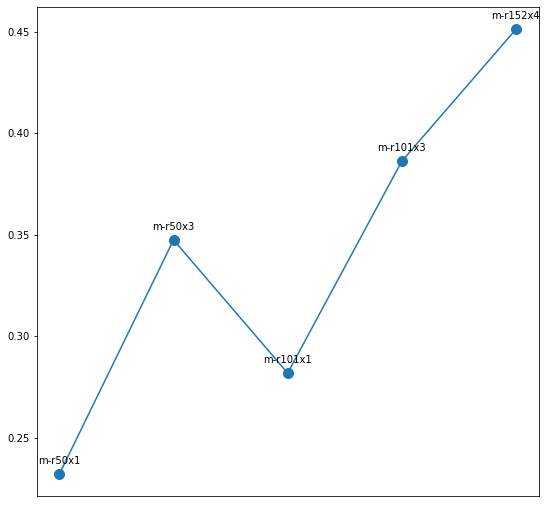

In [17]:
plt.figure(figsize=(9, 9))
plt.plot(auprs_dict.values(), marker=".", markersize=20)
xs = np.arange(0, 5, 1)

# Reference: https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
for i, (x, y) in enumerate(zip(xs, auprs_dict.values())):
    label = list(auprs_dict.keys())[i]
    plt.annotate(label, # this is the text
         (x, y), # this is the point to label
         textcoords="offset points", # how to position the text
         xytext=(0, 10), # distance from text to points (x,y)
         ha='center') # horizontal alignment can be left, right or center
    
plt.xticks([])
plt.savefig("aupr_imagenet_o_bit.png", dpi=300, bbox_inches="tight")